## Homework CUDA

Made by Marina Grigoreva, Stefano Amalberti, Sofie Othilie Dregi

In [ ]:
!nvcc -o devicequery devicequery.cu
!./devicequery

cc1plus: fatal error: devicequery.cu: No such file or directory
compilation terminated.
/bin/bash: line 1: ./devicequery: No such file or directory


In [ ]:
!g++ -O3 -o heat-sequential heat.c

In [ ]:
! ./heat-sequential

CPU Execution Time: 20.877837 seconds
Overall Execution Time: 22.186557 seconds


In [ ]:
!nvcc -o heat heat.cu

cc1plus: fatal error: heat.cu: No such file or directory
compilation terminated.


In [ ]:
!nvprof ./heat

======== Error: application not found.


### Data analysis

In [16]:
df = pd.read_csv("results.csv", names=["Grid.x", "Grid.y", "Timesteps", "Threads.x", "Blocks.x", "CPU Time", "GPU Time", "Speedup"])
df = df[["Grid.x", "Grid.y", "Timesteps", "Threads.x", "Blocks.x", "CPU Time", "GPU Time", "Speedup"]]
df = df.sort_values(by=["Grid.x", "Threads.x"], ignore_index=True)

df

,Grid.x,Grid.y,Timesteps,Threads.x,Blocks.x,CPU Time,GPU Time,Speedup
0,7000,7000,750,1,7000,33.474644,41.907768,0.80
1,7000,7000,750,2,3500,33.439193,11.681479,2.86
2,7000,7000,750,4,1750,32.709571,3.972184,8.23
3,7000,7000,750,8,875,33.253321,1.644972,20.22
4,7000,7000,750,16,438,33.378028,1.653545,20.19
5,7000,7000,750,32,219,32.915471,1.752162,18.79
6,7000,7000,750,64,110,33.258716,0.182553,182.19
7,7000,7000,750,128,55,32.980691,0.170604,193.32
8,7000,7000,750,256,28,33.426419,0.175694,190.25
9,10000,10000,750,1,10000,66.751354,84.531959,0.79


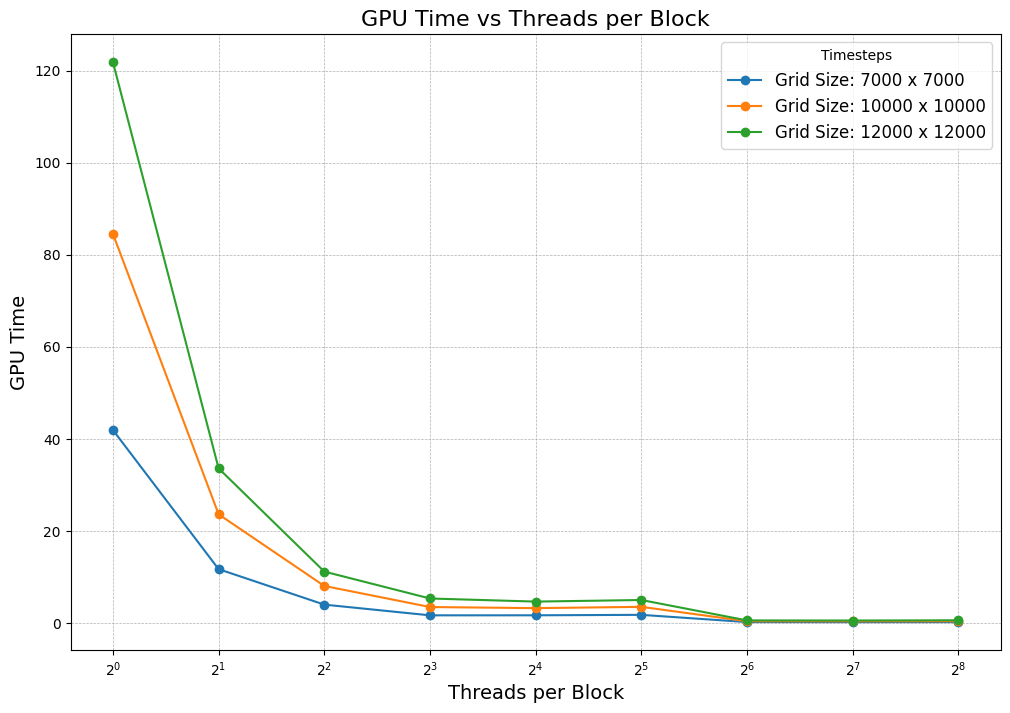

In [17]:
plt.figure(figsize=(12, 8))
grid_sizes = [7000, 10000, 12000]

for grid_size in grid_sizes:
  plt.plot(
      df[df["Grid.x"] == grid_size]["Threads.x"],
      df[df["Grid.x"] == grid_size]["GPU Time"],
      marker='o',
      label=f"Grid Size: {grid_size} x {grid_size}"
  )


plt.xlabel("Threads per Block", fontsize=14)
plt.xscale('log', base=2)
plt.ylabel("GPU Time", fontsize=14)
plt.title("GPU Time vs Threads per Block", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Timesteps", fontsize=12)
plt.savefig('time.png', dpi=300, bbox_inches='tight')
plt.show()

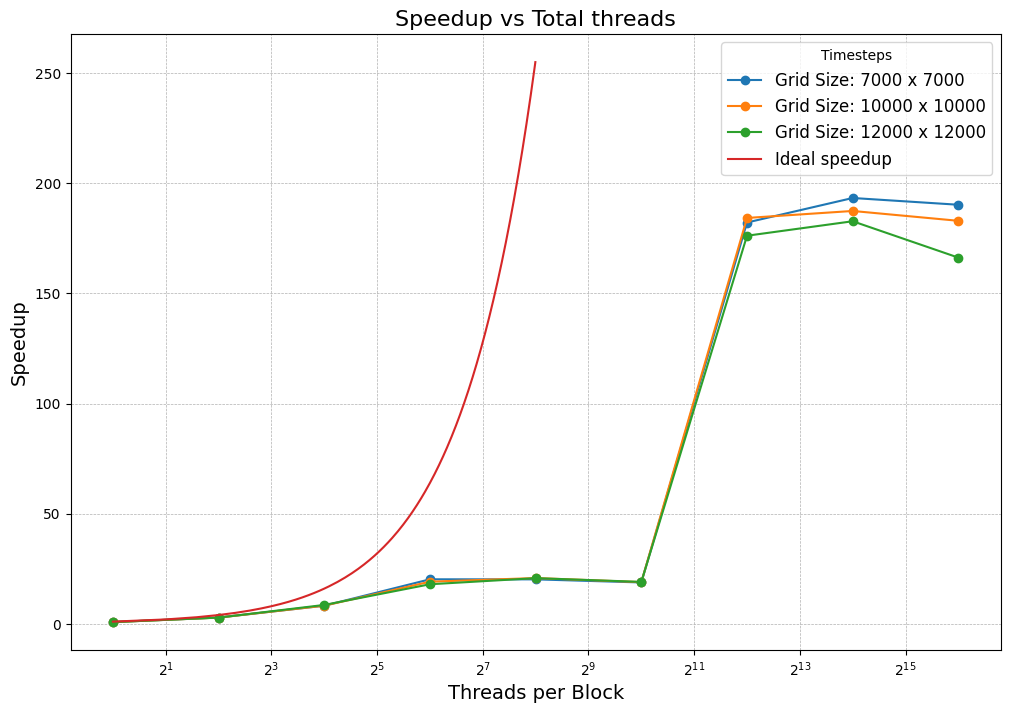

In [35]:
plt.figure(figsize=(12, 8))
grid_sizes = [7000, 10000, 12000]

df["Threads"] = df["Threads.x"] ** 2

for grid_size in grid_sizes:
  plt.plot(
      df[df["Grid.x"] == grid_size]["Threads"],
      df[df["Grid.x"] == grid_size]["Speedup"],
      marker='o',
      label=f"Grid Size: {grid_size} x {grid_size}"
  )

ref_line = [i for i in range(2**0, 2**8)]
plt.plot(ref_line, ref_line, label="Ideal speedup")

plt.xlabel("Threads per Block", fontsize=14)
plt.xscale('log', base=2)
plt.ylabel("Speedup", fontsize=14)
plt.title("Speedup vs Total threads", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Timesteps", fontsize=12)
plt.savefig('speedup.png', dpi=300, bbox_inches='tight')
plt.show()

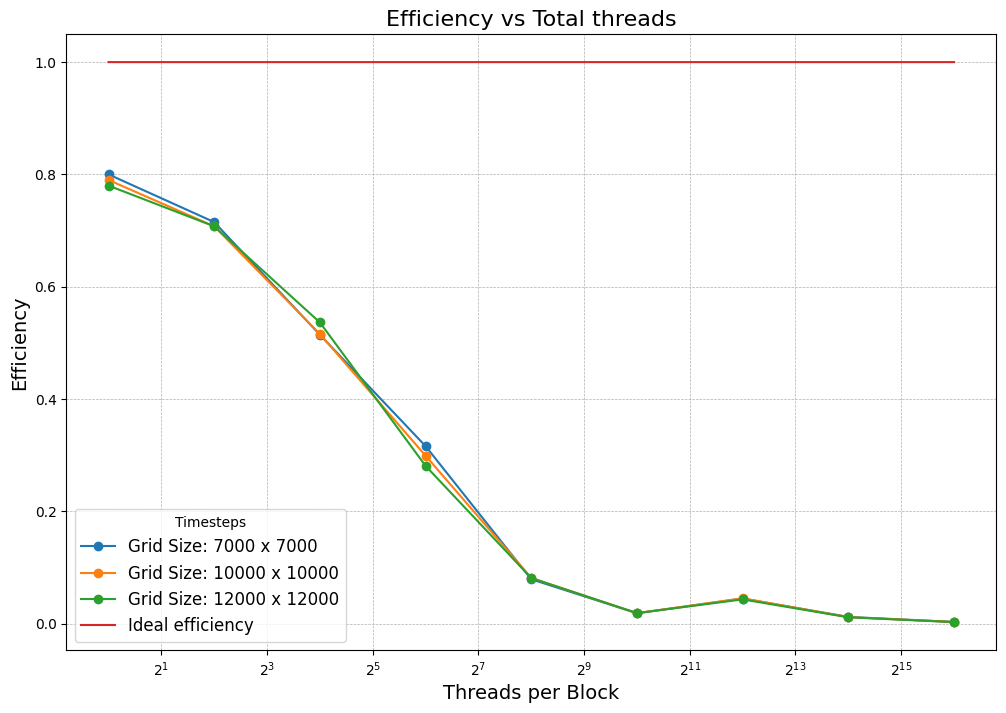

In [34]:
plt.figure(figsize=(12, 8))
grid_sizes = [7000, 10000, 12000]

df["Threads"] = df["Threads.x"] ** 2

# Calculate efficiency
df["Efficiency"] = df["Speedup"] / (df["Threads.x"] ** 2)

for grid_size in grid_sizes:
  plt.plot(
      df[df["Grid.x"] == grid_size]["Threads"],
      df[df["Grid.x"] == grid_size]["Efficiency"],
      marker='o',
      label=f"Grid Size: {grid_size} x {grid_size}"
  )

ref_line = [i for i in range(2**0, 2**16)]
plt.plot(ref_line, [1 for _ in ref_line], label="Ideal efficiency")

plt.xlabel("Threads per Block", fontsize=14)
plt.xscale('log', base=2)
plt.ylabel("Efficiency", fontsize=14)
plt.title("Efficiency vs Total threads", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Timesteps", fontsize=12)
plt.savefig('efficiency.png', dpi=300, bbox_inches='tight')
plt.show()

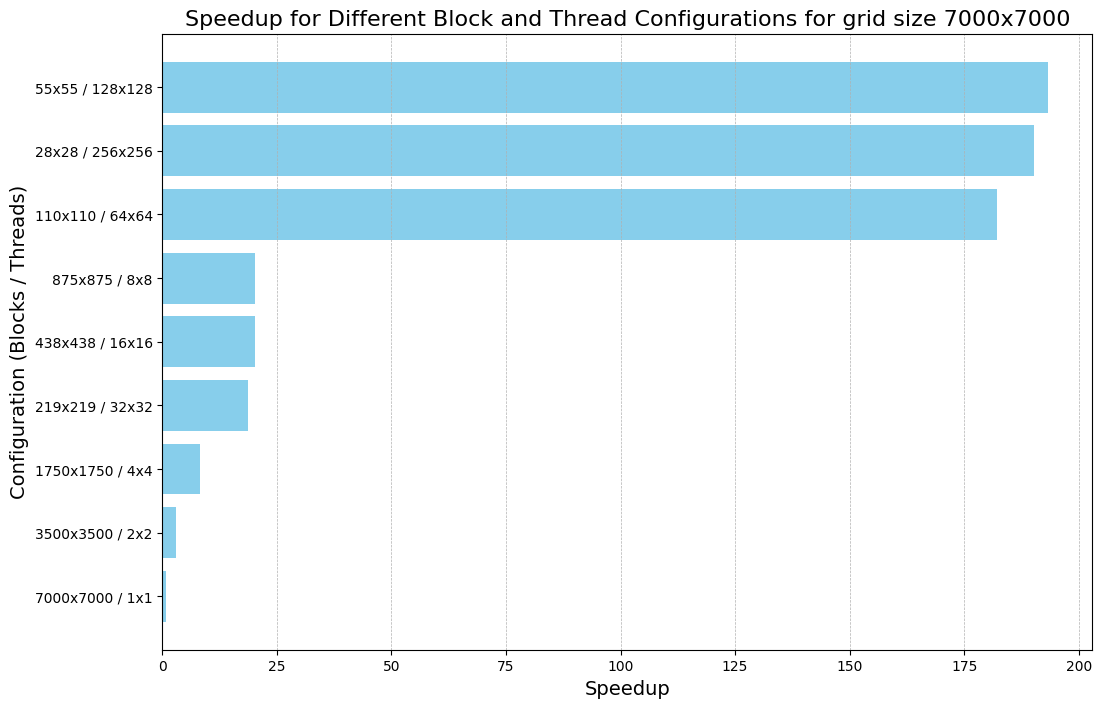

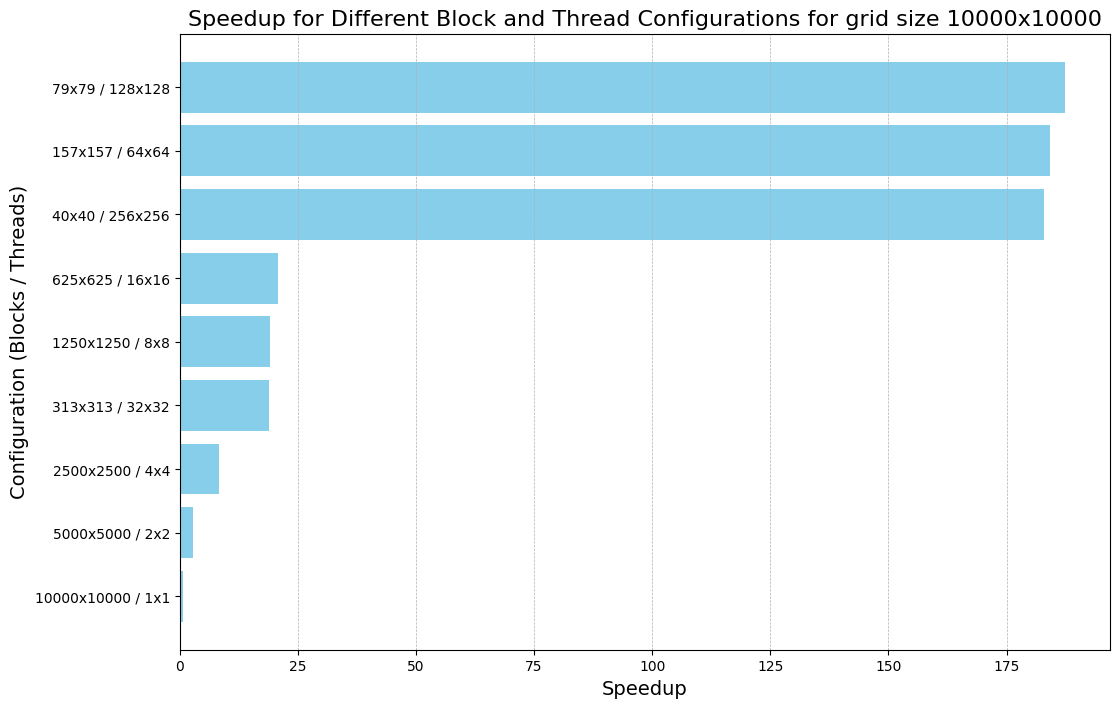

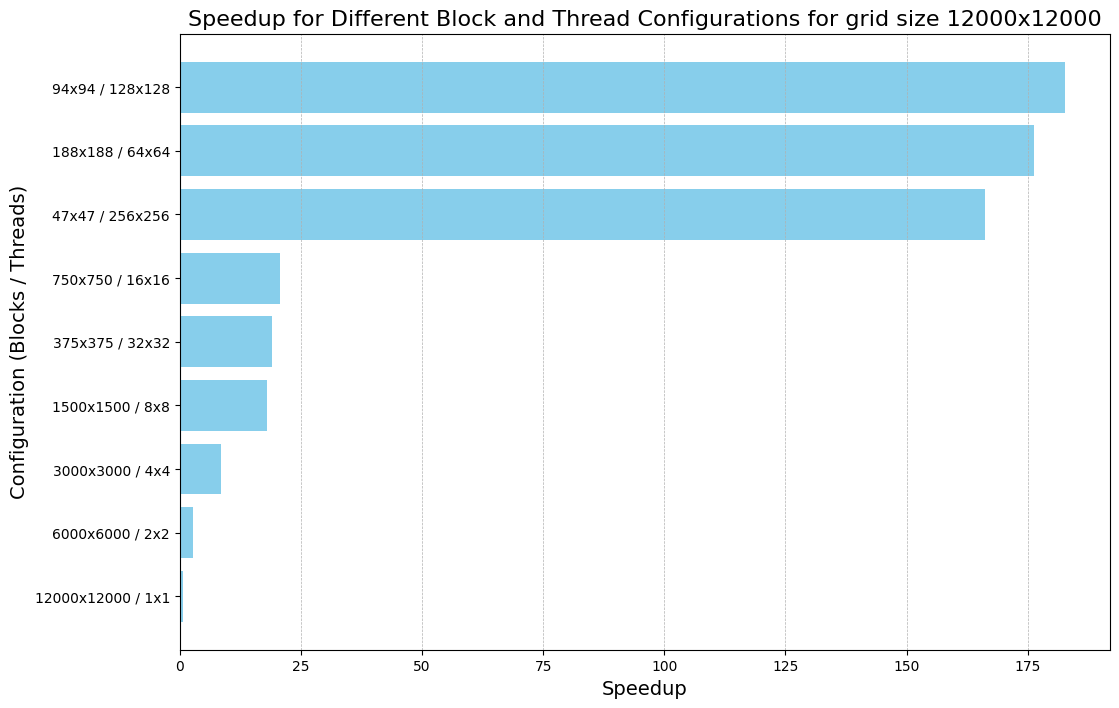

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df["Configuration"] = df["Blocks.x"].astype(str) + "x" + df["Blocks.x"].astype(str) + " / " + df["Threads.x"].astype(str) + "x" + df["Threads.x"].astype(str)

df = df.sort_values("Speedup")

grid_sizes = [7000, 10000, 12000]

for grid_size in grid_sizes:
  plt.figure(figsize=(12, 8))
  plt.barh(df[df["Grid.x"] == grid_size]["Configuration"], df[df["Grid.x"] == grid_size]["Speedup"], color="skyblue")
  plt.xlabel("Speedup", fontsize=14)
  plt.ylabel("Configuration (Blocks / Threads)", fontsize=14)
  plt.title(f"Speedup for Different Block and Thread Configurations for grid size {grid_size}x{grid_size}", fontsize=16)
  plt.grid(True, axis="x", linestyle="--", linewidth=0.5)
  plt.savefig(f'speedup_{grid_size}.png', dpi=300, bbox_inches='tight')
  plt.show()